In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

import datetime

from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split


from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder


/home/ramon/Documents/deeptrack/cluster_env/umap/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


#### Funcion de ganancia

In [2]:
#idx2amount = {i:m for i, m in zip(df.index, df.Monto)}

def _loss(i, y_true, y_pred):
    #global idx2amount
    #ganancia = idx2amount[i] * 0.25
    if y_pred == 1 and y_true == 1:
        return 0
    elif y_pred == 0 and y_true == 1:
        return -100#- idx2amount[i]
    elif y_pred == 0 and y_true == 0:
        return 25#ganancia
    elif y_pred == 1 and y_true == 0:
        return -25#- ganancia


def custom_loss_calc(y_index, true_array, pred_array):
    return sum(_loss(i, yp, yt) 
               for i, yp, yt in 
               zip(y_index, pred_array, true_array)
              )

#### EN la siguiente celda se levantan los datos, se crean y seleccionan variables y se entrena el modelo con cros validation

In [3]:
dflr = pd.read_csv('fraude_scaled_imputed.tsv', sep='\t') 

dflr = pd.get_dummies(dflr)

dflr['A_exp'] = dflr.A ** 2

dflr['B_exp'] = dflr.B ** 2
dflr['BxS'] = dflr.B * dflr.S
dflr = dflr[['A', 'A_exp','B','C','B_exp','BxS', 'S','Monto','Fraude','G','F']]





X_lr = dflr.drop('Fraude', axis=1)
y_lr = dflr.Fraude
X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.30, random_state=42)
cv = StratifiedKFold(n_splits=6)



clf = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.8,class_weight='balanced', random_state=26)

# 


results_stored = {}
for i, (train, test) in enumerate(cv.split(X_train, y_train)):
    results_stored[i] = {}
    clf.fit(X_train.iloc[train], y_train.iloc[train])
    
    y_probs = clf.predict_proba(X_train.iloc[test].values)
    
    results_stored[i]['y_test'] = [y_train.iloc[test]]
    results_stored[i]['y_prob'] = [y_probs]


    




/home/ramon/Documents/deeptrack/cluster_env/umap/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ramon/Documents/deeptrack/cluster_env/umap/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ramon/Documents/deeptrack/cluster_env/umap/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ramon/Documents/deeptrack/cluster_env/umap/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/ramon/

X = dflr.drop('Fraude', axis=1)
y = dflr.Fraude
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
n_samples, n_features = X.shape

In [5]:
ganancia = {}

#### Plot de la ganancia en funcion del corte

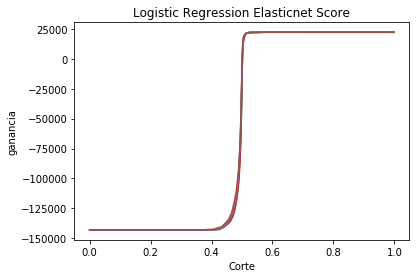

22250
22250
22275
22275
22275
22275


<Figure size 432x288 with 0 Axes>

In [6]:
score_gan_0 = []
score_gan_1 = []
score_gan_2 = []
score_gan_3 = []
score_gan_4 = []
score_gan_5 = []
score_auc_3 = []
ganancia_dic = {}
ganancia_dic = {}

for f in range(0, 6):
    ganancia_dic['score_gan_{}'.format(f)] = []
    for i in np.arange(0, 1, 0.001):

        #pred = ppc['out'].mean(axis=0) > i
        ypred = [1 if x > i else 0 for x in map(lambda x:x[0], results_stored[f]['y_prob'][0])]
        ganancia_dic['score_gan_{}'.format(f)].append(custom_loss_calc(y_test.index, results_stored[f]['y_test'][0], ypred))
        
plt.plot(np.arange(0, 1, 0.001), ganancia_dic['score_gan_0'])
plt.plot(np.arange(0, 1, 0.001), ganancia_dic['score_gan_1'])
plt.plot(np.arange(0, 1, 0.001), ganancia_dic['score_gan_2'])  # < -- up
plt.plot(np.arange(0, 1, 0.001), ganancia_dic['score_gan_3'])
plt.plot(np.arange(0, 1, 0.001), ganancia_dic['score_gan_4'])
plt.plot(np.arange(0, 1, 0.001), ganancia_dic['score_gan_5'])

plt.title('Logistic Regression Elasticnet Score')
plt.xlabel('Corte')
plt.ylabel('ganancia')
plt.show()
plt.savefig('Logistic Regression Score Ganancia')        

lr_8 = []
for f in range(0, 6):
    #knn_8['score_gan_{}'.format(f)] = []
    ypred = [1 if x > 0.8 else 0 for x in map(lambda x:x[0], results_stored[f]['y_prob'][0])]
    print(custom_loss_calc(results_stored[f]['y_test'][0].index, results_stored[f]['y_test'][0], ypred))
    lr_8.append(custom_loss_calc(results_stored[f]['y_test'][0].index, results_stored[f]['y_test'][0], ypred))

#### Coeficientes de las variables

In [7]:
col_coef = {col:clf.coef_[0][i] for i, col in enumerate(dflr.drop('Fraude', axis=1).columns)}
col_coef

{'A': 1.3274638538018122e-07,
 'A_exp': 8.840688228864722e-07,
 'B': 3.803486797015477e-06,
 'C': 3.6206792031294684e-07,
 'B_exp': 5.304399366366154e-05,
 'BxS': 0.0002324592643527769,
 'S': 1.6102383593665037e-05,
 'Monto': -4.063479785547677e-05,
 'G': 4.426518561642349e-09,
 'F': 3.809981034268879e-09}

#### Ganancia del test

In [8]:
lr_8_test = []
y_prob_test = clf.predict(X_test)
ypred_test = [1 if x > 0.8 else 0 for x in y_prob_test]
print(custom_loss_calc(y_test.index, y_test, ypred_test))
lr_8_test.append(custom_loss_calc(y_test.index, y_test, ypred_test))

-298000


#### Accuracy del test

In [9]:
from sklearn.metrics import accuracy_score
round(accuracy_score(y_test, ypred_test), 4)

0.3711